In [1]:
import globals as gl
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display, HTML

import warnings
warnings.filterwarnings("ignore")

import matplotlib.cm as cm  

plt.style.use('default')

Base directory found: /cifs/diedrichsen/data/Chord_exp/ExtFlexChord
Atlas directory found: /cifs/diedrichsen/data/Atlas_templates/fs_LR_32


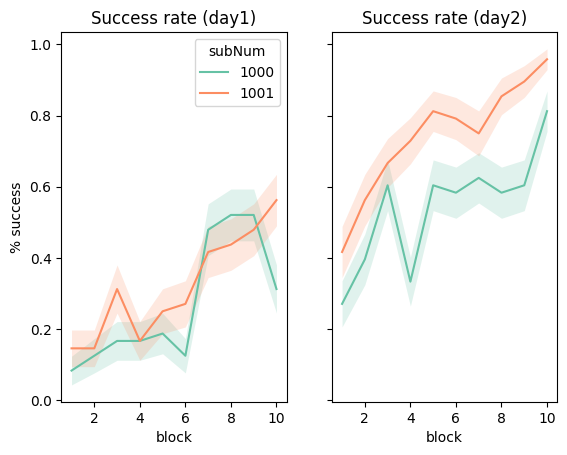

In [2]:
snS = [1000, 1001]
experiment = 'efc4'

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)

for d, day in enumerate([1, 2]):
    dat = pd.DataFrame()
    for sn in snS:
        dat_tmp = pd.read_csv(os.path.join(gl.baseDir, experiment, 'pilot', f'day{day}', f'subj{sn}', f'{experiment}_{sn}.dat'), sep='\t')
        dat = pd.concat([dat, dat_tmp])

    if day == 1:
        sns.lineplot(data=dat, ax=axs[d], x='BN', hue='subNum', y='trialPoint', errorbar='se', err_kws={'linewidth': 0}, palette='Set2')
    else:
        sns.lineplot(data=dat, ax=axs[d], x='BN', hue='subNum', y='trialPoint', errorbar='se', err_kws={'linewidth': 0}, palette='Set2', legend=False)

    axs[d].set_title(f'Success rate (day{day})')
    axs[d].set_ylabel('% success')
    axs[d].set_xlabel('block')


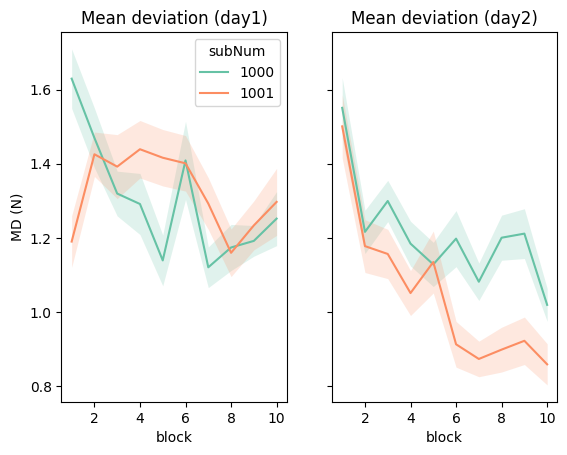

In [13]:
snS = [1000, 1001]
experiment = 'efc4'

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)

for d, day in enumerate([1, 2]):
    data = pd.DataFrame()
    for sn in snS:
        data_tmp = pd.read_csv(os.path.join(gl.baseDir, experiment, 'pilot', f'day{day}', f'subj{sn}', f'single_trial.tsv'), sep='\t')
        data_tmp['subNum'] = data_tmp['subNum'].astype(int)
        data= pd.concat([data, data_tmp])

    if day == 1:
        sns.lineplot(data=data, ax=axs[d], x='BN', hue='subNum', y='MD', errorbar='se', err_kws={'linewidth': 0}, palette='Set2')
    else:
        sns.lineplot(data=data, ax=axs[d], x='BN', hue='subNum', y='MD', errorbar='se', err_kws={'linewidth': 0}, palette='Set2', legend=False)

    axs[d].set_title(f'Mean deviation (day{day})')
    axs[d].set_ylabel('MD (N)')
    axs[d].set_xlabel('block')

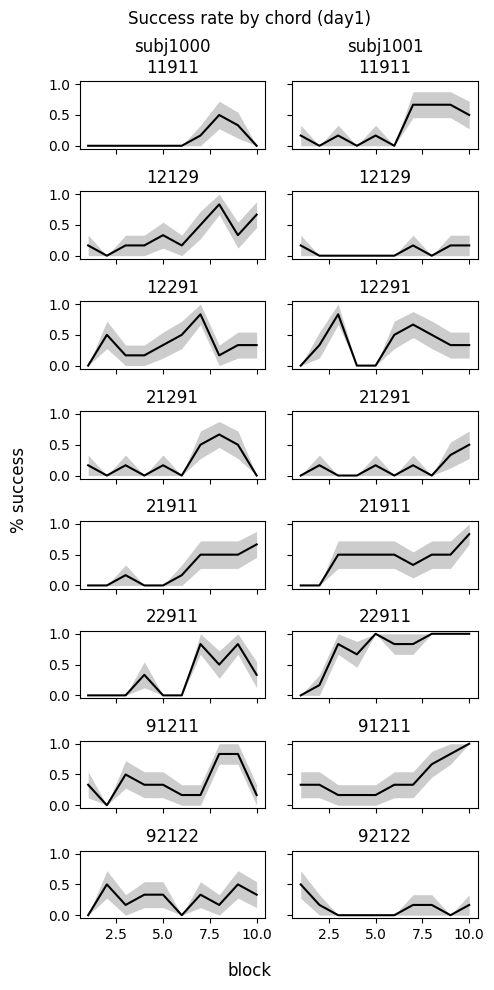

In [4]:
snS = [1000, 1001]
experiment = 'efc4'

day = 1

fig, axs = plt.subplots(nrows=8, ncols=len(snS), sharex=True, sharey=True, figsize=(5, 10))
for s, sn in enumerate(snS):
    dat = pd.read_csv(os.path.join(gl.baseDir, experiment, 'pilot', f'day{day}',f'subj{sn}', f'{experiment}_{sn}.dat'), sep='\t')

    for ch, chordID in enumerate(dat.chordID.astype(int).sort_values().unique()):
        sns.lineplot(data=dat[dat['chordID']==chordID], ax=axs[ch, s], x='BN',  y='trialPoint', errorbar='se', err_kws={'linewidth': 0}, color='k', legend=False)
        if ch == 0:
            axs[ch, s].set_title(f'subj{sn}\n{chordID}')
        else:
            axs[ch, s].set_title(f'{chordID}')

        axs[ch, s].set_yticks([0, .5, 1])
        axs[ch, s].set_ylabel('')
        axs[ch, s].set_xlabel('')

fig.supxlabel('block')
fig.supylabel('% success')
fig.suptitle(f'Success rate by chord (day{day})')
fig.tight_layout()



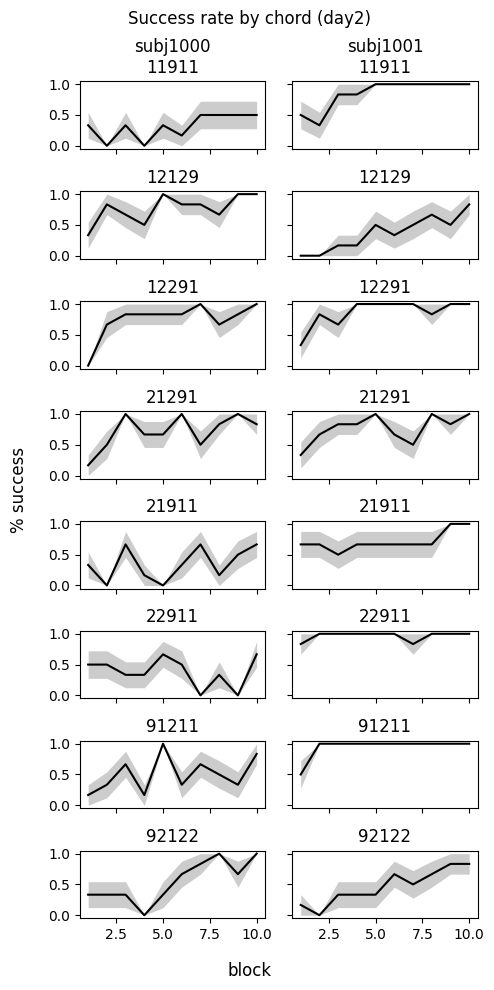

In [5]:
snS = [1000, 1001]
experiment = 'efc4'

day = 2

fig, axs = plt.subplots(nrows=8, ncols=len(snS), sharex=True, sharey=True, figsize=(5, 10))
for s, sn in enumerate(snS):
    dat = pd.read_csv(os.path.join(gl.baseDir, experiment, 'pilot', f'day{day}',f'subj{sn}', f'{experiment}_{sn}.dat'), sep='\t')

    for ch, chordID in enumerate(dat.chordID.astype(int).sort_values().unique()):
        sns.lineplot(data=dat[dat['chordID']==chordID], ax=axs[ch, s], x='BN',  y='trialPoint', errorbar='se', err_kws={'linewidth': 0}, color='k', legend=False)
        if ch == 0:
            axs[ch, s].set_title(f'subj{sn}\n{chordID}')
        else:
            axs[ch, s].set_title(f'{chordID}')

        axs[ch, s].set_yticks([0, .5, 1])
        axs[ch, s].set_ylabel('')
        axs[ch, s].set_xlabel('')

fig.supxlabel('block')
fig.supylabel('% success')
fig.suptitle(f'Success rate by chord (day{day})')
fig.tight_layout()

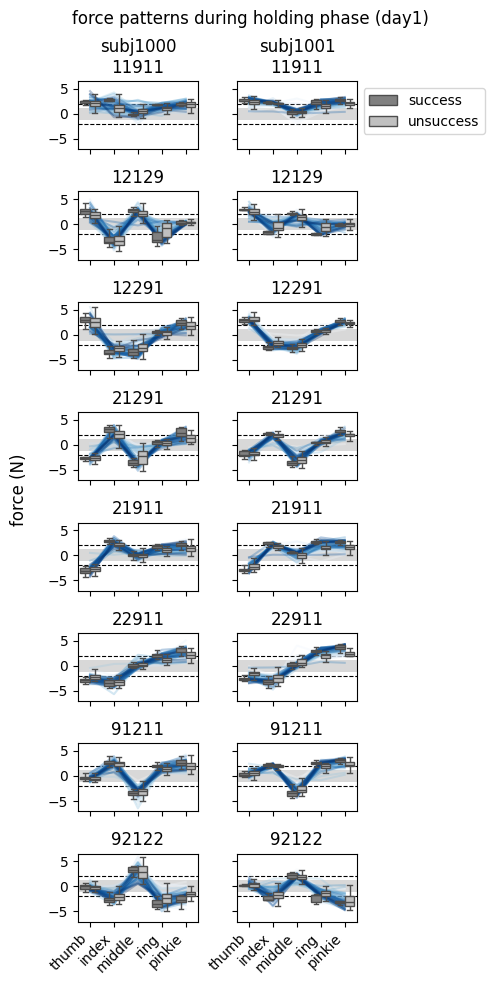

In [6]:
snS = [1000, 1001]
experiment = 'efc4'

day = 1

fig, axs = plt.subplots(nrows=8, ncols=len(snS), sharex=True, sharey=True, figsize=(5, 10))

for s, sn in enumerate(snS):

    data = pd.read_csv(os.path.join(gl.baseDir, experiment, 'pilot', f'day{day}', f'subj{sn}', f'single_trial.tsv'), sep='\t')
    
    data['trialPoint'] = data['trialPoint'].map(gl.trialPoint_mapping)

    for ch, chordID in enumerate(data.chordID.astype(int).sort_values().unique()):
        data_tmp = data[data['chordID'] == chordID]
        data_tmp_melt = data_tmp.melt(id_vars=['chordID', 'trialPoint'],value_vars=['thumb', 'index', 'middle', 'ring', 'pinkie'], var_name='finger', value_name='force')
        force = data_tmp[['thumb', 'index', 'middle', 'ring', 'pinkie']].to_numpy()
        
        colors = cm.Blues(np.linspace(0, 1, force.shape[0]))
        
        axs[ch, s].axhspan(-gl.fthresh, gl.fthresh, color='gray', alpha=0.3, lw=0)
        axs[ch, s].axhline(gl.ftarget, color='k', lw=.8, ls='--')
        axs[ch, s].axhline(-gl.ftarget, color='k', lw=.8, ls='--')
        
        for f, c in zip(force, colors):     
            axs[ch, s].plot(f, color=c, alpha=.3)
        
        if ch == 0:
            axs[ch, s].set_title(f'subj{sn}\n{chordID}')
            if s == 1:
                sns.boxplot(data=data_tmp_melt, ax=axs[ch, s], x='finger', hue='trialPoint', y='force', showfliers=False, palette=['grey', 'silver'], hue_order=['success', 'unsuccess'])
            else:
                sns.boxplot(data=data_tmp_melt, ax=axs[ch, s], x='finger', hue='trialPoint', y='force', showfliers=False, legend=False, palette=['grey', 'silver'], hue_order=['success', 'unsuccess'])
        else:
            axs[ch, s].set_title(f'{chordID}')
            sns.boxplot(data=data_tmp_melt, ax=axs[ch, s], x='finger', hue='trialPoint', y='force', showfliers=False, legend=False, palette=['grey', 'silver'], hue_order=['success', 'unsuccess'])
            
        axs[ch, s].set_ylabel('')

axs[0, 1].legend(bbox_to_anchor=(1, 1))
axs[-1, 0].set_xlabel('')
axs[-1, -1].set_xlabel('')
axs[-1, 0].set_xticks(axs[-1, 0].get_xticks(), rotation=45, labels=axs[-1, 0].get_xticklabels(), ha='right')
axs[-1, -1].set_xticks(axs[-1, -1].get_xticks(), rotation=45, labels=axs[-1, 0].get_xticklabels(), ha='right')

fig.supylabel('force (N)')
fig.suptitle(f'force patterns during holding phase (day{day})')
fig.tight_layout()

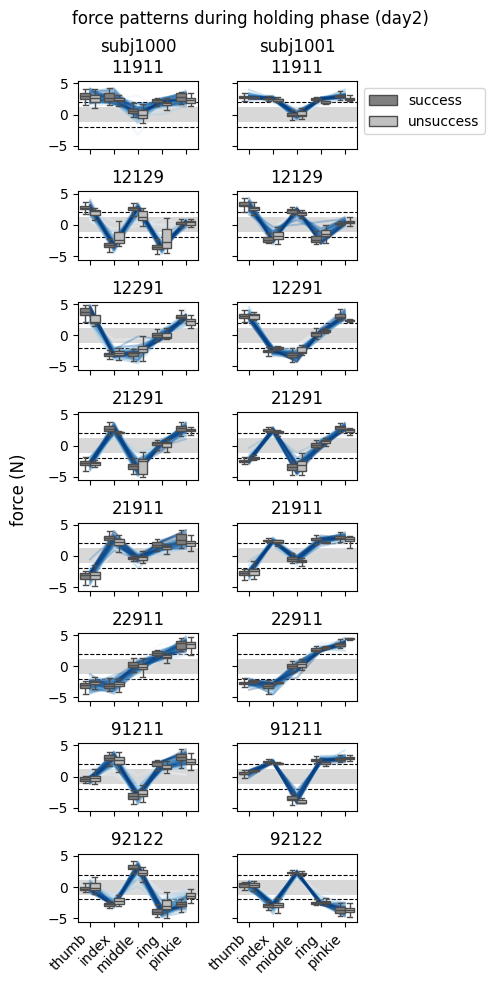

In [7]:
snS = [1000, 1001]
experiment = 'efc4'

day = 2

fig, axs = plt.subplots(nrows=8, ncols=len(snS), sharex=True, sharey=True, figsize=(5, 10))

for s, sn in enumerate(snS):

    data = pd.read_csv(os.path.join(gl.baseDir, experiment, 'pilot', f'day{day}', f'subj{sn}', f'single_trial.tsv'), sep='\t')

    data['trialPoint'] = data['trialPoint'].map(gl.trialPoint_mapping)

    for ch, chordID in enumerate(data.chordID.astype(int).sort_values().unique()):
        data_tmp = data[data['chordID'] == chordID]
        data_tmp_melt = data_tmp.melt(id_vars=['chordID', 'trialPoint'],value_vars=['thumb', 'index', 'middle', 'ring', 'pinkie'], var_name='finger', value_name='force')
        force = data_tmp[['thumb', 'index', 'middle', 'ring', 'pinkie']].to_numpy()

        colors = cm.Blues(np.linspace(0, 1, force.shape[0]))

        axs[ch, s].axhspan(-gl.fthresh, gl.fthresh, color='gray', alpha=0.3, lw=0)
        axs[ch, s].axhline(gl.ftarget, color='k', lw=.8, ls='--')
        axs[ch, s].axhline(-gl.ftarget, color='k', lw=.8, ls='--')

        for f, c in zip(force, colors):
            axs[ch, s].plot(f, color=c, alpha=.3)

        if ch == 0:
            axs[ch, s].set_title(f'subj{sn}\n{chordID}')
            if s == 1:
                sns.boxplot(data=data_tmp_melt, ax=axs[ch, s], x='finger', hue='trialPoint', y='force', showfliers=False, palette=['grey', 'silver'], hue_order=['success', 'unsuccess'])
            else:
                sns.boxplot(data=data_tmp_melt, ax=axs[ch, s], x='finger', hue='trialPoint', y='force', showfliers=False, legend=False, palette=['grey', 'silver'], hue_order=['success', 'unsuccess'])
        else:
            axs[ch, s].set_title(f'{chordID}')
            sns.boxplot(data=data_tmp_melt, ax=axs[ch, s], x='finger', hue='trialPoint', y='force', showfliers=False, legend=False, palette=['grey', 'silver'], hue_order=['success', 'unsuccess'])

        axs[ch, s].set_ylabel('')

axs[0, 1].legend(bbox_to_anchor=(1, 1))
axs[-1, 0].set_xlabel('')
axs[-1, -1].set_xlabel('')
axs[-1, 0].set_xticks(axs[-1, 0].get_xticks(), rotation=45, labels=axs[-1, 0].get_xticklabels(), ha='right')
axs[-1, -1].set_xticks(axs[-1, -1].get_xticks(), rotation=45, labels=axs[-1, 0].get_xticklabels(), ha='right')

fig.supylabel('force (N)')
fig.suptitle(f'force patterns during holding phase (day{day})')
fig.tight_layout()

Text(0.5, 0.98, 'Average force deviation from successful trials')

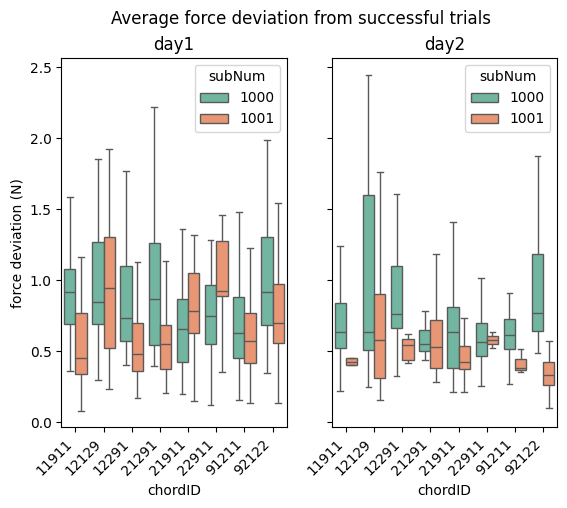

In [8]:
snS = [1000, 1001]
experiment = 'efc4'

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,)

for d, day in enumerate([1, 2]):
    dev = pd.DataFrame()
    for s, sn in enumerate(snS):

        data = pd.read_csv(os.path.join(gl.baseDir, experiment, 'pilot', f'day{day}', f'subj{sn}', f'single_trial.tsv'), sep='\t')

        data['trialPoint'] = data['trialPoint'].map(gl.trialPoint_mapping)

        for ch, chordID in enumerate(data.chordID.astype(int).sort_values().unique()):
            data_tmp = data[data['chordID'] == chordID]
            data_tmp_melt = data_tmp.melt(id_vars=['chordID', 'trialPoint'],value_vars=['thumb', 'index', 'middle', 'ring', 'pinkie'], var_name='finger', value_name='force')

            force_success = data_tmp[['thumb', 'index', 'middle', 'ring', 'pinkie']][data_tmp['trialPoint'] == 'success'].to_numpy().mean(axis=0)
            force_unsuccess = data_tmp[ ['thumb', 'index', 'middle', 'ring', 'pinkie']][data_tmp['trialPoint'] == 'unsuccess'].to_numpy()

            dev_tmp = pd.DataFrame((np.abs(force_unsuccess - force_success).mean(axis=1)), columns=['dev'])
            dev_tmp['chordID'] = chordID
            dev_tmp['subNum'] = sn

            dev = pd.concat([dev, dev_tmp])

    sns.boxplot(data=dev, ax=axs[d], x='chordID', y='dev', hue='subNum', showfliers=False, palette='Set2')

    axs[d].set_ylabel('force deviation (N)')

    axs[d].set_title(f'day{day}')

    axs[d].set_xticks(axs[s].get_xticks())
    axs[d].set_xticklabels(axs[s].get_xticklabels(), rotation=45, ha='right')

fig.suptitle('Average force deviation from successful trials')

Text(0.5, 0.98, 'absolute derivative of force (day1)')

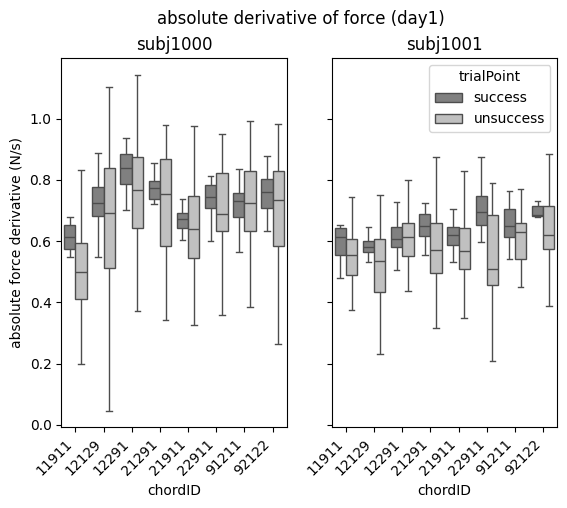

In [9]:
snS = [1000, 1001]
experiment = 'efc4'

day = 1

fig, axs = plt.subplots(nrows=1, ncols=len(snS), sharex=True, sharey=True,)

for s, sn in enumerate(snS):

    data = pd.read_csv(os.path.join(gl.baseDir, experiment, 'pilot', f'day{day}', f'subj{sn}', f'single_trial.tsv'), sep='\t')

    data['trialPoint'] = data['trialPoint'].map(gl.trialPoint_mapping)
    data['chordID'] = data['chordID'].astype(int)

    data_melt = data.melt(id_vars=['chordID', 'trialPoint', 'TN', 'BN'],value_vars=['thumb_der', 'index_der', 'middle_der', 'ring_der', 'pinkie_der'], var_name='finger', value_name='force_der')

    data_melt = data_melt.groupby(['chordID', 'trialPoint', 'TN', 'BN']).mean(numeric_only=True).reset_index()

    if s==1:
        sns.boxplot(data=data_melt, ax=axs[s], x='chordID', y='force_der', hue='trialPoint', showfliers=False, palette=['grey', 'silver'], hue_order=['success', 'unsuccess'])
    else:
        sns.boxplot(data=data_melt, ax=axs[s], x='chordID', y='force_der', hue='trialPoint', showfliers=False, palette=['grey', 'silver'], hue_order=['success', 'unsuccess'], legend=False)

    axs[s].set_xticks(axs[s].get_xticks())
    axs[s].set_xticklabels(axs[s].get_xticklabels(), rotation=45, ha='right')
    axs[s].set_ylabel('absolute force derivative (N/s)')

    axs[s].set_title(f'subj{sn}')

fig.suptitle(f'absolute derivative of force (day{day})')


Text(0.5, 0.98, 'absolute derivative of force (day2)')

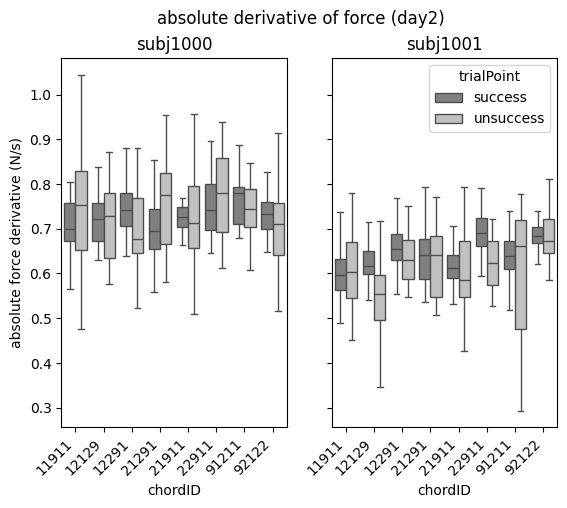

In [10]:
snS = [1000, 1001]
experiment = 'efc4'

day = 2

fig, axs = plt.subplots(nrows=1, ncols=len(snS), sharex=True, sharey=True,)

for s, sn in enumerate(snS):

    data = pd.read_csv(os.path.join(gl.baseDir, experiment, 'pilot', f'day{day}', f'subj{sn}', f'single_trial.tsv'), sep='\t')

    data['trialPoint'] = data['trialPoint'].map(gl.trialPoint_mapping)
    data['chordID'] = data['chordID'].astype(int)

    data_melt = data.melt(id_vars=['chordID', 'trialPoint', 'TN', 'BN'],value_vars=['thumb_der', 'index_der', 'middle_der', 'ring_der', 'pinkie_der'], var_name='finger', value_name='force_der')

    data_melt = data_melt.groupby(['chordID', 'trialPoint', 'TN', 'BN']).mean(numeric_only=True).reset_index()

    if s==1:
        sns.boxplot(data=data_melt, ax=axs[s], x='chordID', y='force_der', hue='trialPoint', showfliers=False, palette=['grey', 'silver'], hue_order=['success', 'unsuccess'])
    else:
        sns.boxplot(data=data_melt, ax=axs[s], x='chordID', y='force_der', hue='trialPoint', showfliers=False, palette=['grey', 'silver'], hue_order=['success', 'unsuccess'], legend=False)

    axs[s].set_xticks(axs[s].get_xticks())
    axs[s].set_xticklabels(axs[s].get_xticklabels(), rotation=45, ha='right')
    axs[s].set_ylabel('absolute force derivative (N/s)')

    axs[s].set_title(f'subj{sn}')

fig.suptitle(f'absolute derivative of force (day{day})')

Fitting Subj 0 model 0
Fitting Subj 0 model 1
Fitting Subj 0 model 2
Fitting Subj 0 model 0
Fitting Subj 0 model 1
Fitting Subj 0 model 2
Fitting Subj 0 model 0
Fitting Subj 0 model 1
Fitting Subj 0 model 2
Fitting Subj 0 model 0
Fitting Subj 0 model 1
Fitting Subj 0 model 2


Text(0.5, 0.98, 'force model fit')

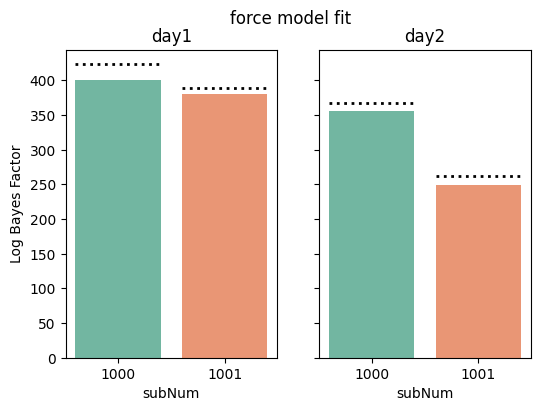

In [11]:
import PcmPy as pcm

experiment = 'efc4'

snS = [1000, 1001]

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(6, 4))

for d, day in enumerate([1, 2]):
    T = {
        'Log Bayes Factor': [],
        'ceil': [],
        'subNum': []
    }

    for s, sn in enumerate(snS):

        data = pd.read_csv(os.path.join(gl.baseDir, experiment, 'pilot', f'day{day}', f'subj{sn}', f'single_trial.tsv'), sep='\t')
        data_succ = data[data['trialPoint'] == 1].groupby(['chordID']).mean(numeric_only=True)[['thumb', 'index', 'middle', 'ring', 'pinkie']].to_numpy()
        G = data_succ @ data_succ.T / 5

        data_unsucc = data[data['trialPoint'] == 0].groupby(['chordID', 'BN']).mean(numeric_only=True).reset_index()
        y = data_unsucc[['thumb', 'index', 'middle', 'ring', 'pinkie']].to_numpy()

        M = []
        M.append(pcm.FixedModel('null', np.zeros((8, 8))))
        # M.append(pcm.FixedModel('eye', np.eye(8)))
        M.append(pcm.FixedModel('force', G))
        M.append(pcm.FreeModel('ceil', 8))

        obs_des = {'cond_vec': data_unsucc['chordID'],
                   'part_vec': data_unsucc['BN']}
        Dataset = pcm.dataset.Dataset(y, obs_descriptors=obs_des)

        Y = []
        Y.append(Dataset)

        T_in, theta_in = pcm.fit_model_individ(Y, M, fit_scale=True, verbose=True, fixed_effect='block')

        likelihood = T_in.likelihood
        baseline = likelihood.loc[:,'null'].values
        likelihood = likelihood - baseline.reshape(-1,1)

        T['Log Bayes Factor'].append(likelihood['force'].values[0])
        T['ceil'].append(likelihood['ceil'].values[0])
        T['subNum'].append(sn)

    T = pd.DataFrame(T)

    width = .8
    sns.barplot(data=T, x='subNum', y='Log Bayes Factor', ax=axs[d], palette='Set2', width=.8)

    axs[d].set_title(f'day{day}')

    for s, sn in enumerate(snS):
        axs[d].hlines(T.ceil.iloc[s], s-width / 2, s+width/2, lw=2, ls=':', color='k')

fig.suptitle(f'force model fit')